# Exploratory Data Analysis

Descriptive statistics, plots and sanity checks of the final dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("data/twitch-data-all.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel              788 non-null    object 
 1   watch_time_minutes   788 non-null    int64  
 2   stream_time_minutes  788 non-null    int64  
 3   peak_viewers         788 non-null    int64  
 4   average_viewers      788 non-null    int64  
 5   followers            788 non-null    int64  
 6   followers_gained     788 non-null    int64  
 7   views_gained         788 non-null    int64  
 8   partnered            788 non-null    bool   
 9   mature               788 non-null    bool   
 10  language             788 non-null    object 
 11  ranking              788 non-null    float64
 12  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 69.4+ KB


In [33]:
df

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,ranking,earnings_usd
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,2,8454427
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,3,5847541
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,12,2844985
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,29,1903580
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,4,5295582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,ZiggyDLive,123398085,99075,18437,1227,173807,15899,4249580,True,False,English,1617,124020
784,LAGTVMaximusBlack,123125340,161535,7138,725,256353,13251,2310313,True,True,English,401,380499
785,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,4318,51516
786,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,586,283763


In [34]:
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,ranking,earnings_usd
count,788,788,788,788,788,788,788,788,788
mean,444420721,120877,37234,4526,637781,232395,11651446,1344,460808
std,592129860,79720,56308,6044,864632,372630,26869025,1785,718980
min,122192850,9555,1357,297,28818,-15772,175788,1,23574
25%,167321752,77498,9544,1465,196510,48595,3699206,241,122655
50%,245667142,109432,18300,2488,366843,116974,6266136,646,263527
75%,459390540,142796,38268,4950,727318,254439,12231532,1644,534276
max,6196161750,521445,538444,53986,8938903,3966525,670137548,9977,9626712


## Check distribution of key variables

Explore the distribution of numeric data variables. Some may be highly skewed and require a log transformation.

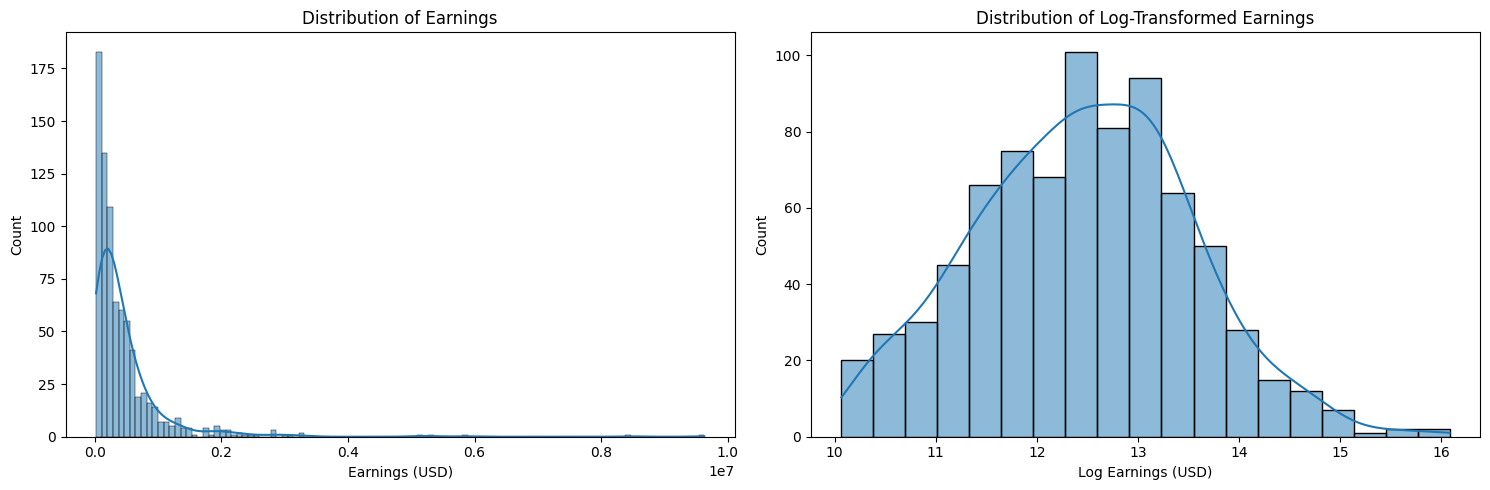

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.earnings_usd, kde=True, ax=axes[0])
axes[0].set_xlabel('Earnings (USD)')
axes[0].set_title('Distribution of Earnings')

sns.histplot(np.log(df.earnings_usd), kde=True, ax=axes[1])
axes[1].set_xlabel('Log Earnings (USD)')
axes[1].set_title('Distribution of Log-Transformed Earnings')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Log-Transformed Stream Time')

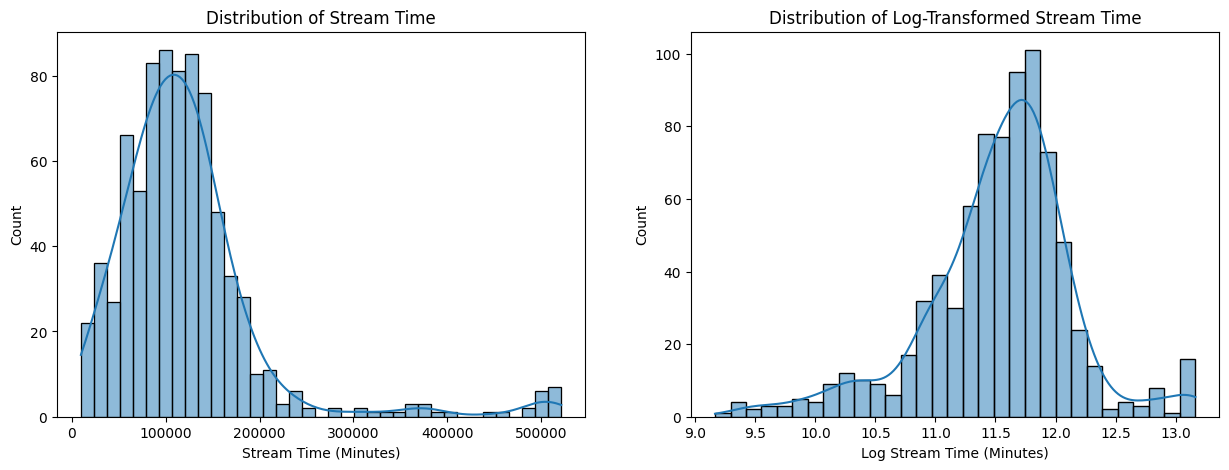

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.stream_time_minutes, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Stream Time (Minutes)')
axes[0].set_title('Distribution of Stream Time')

sns.histplot(np.log(df.stream_time_minutes), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Stream Time (Minutes)')
axes[1].set_title('Distribution of Log-Transformed Stream Time')

Text(0.5, 1.0, 'Distribution of Log-Transformed Watch Time')

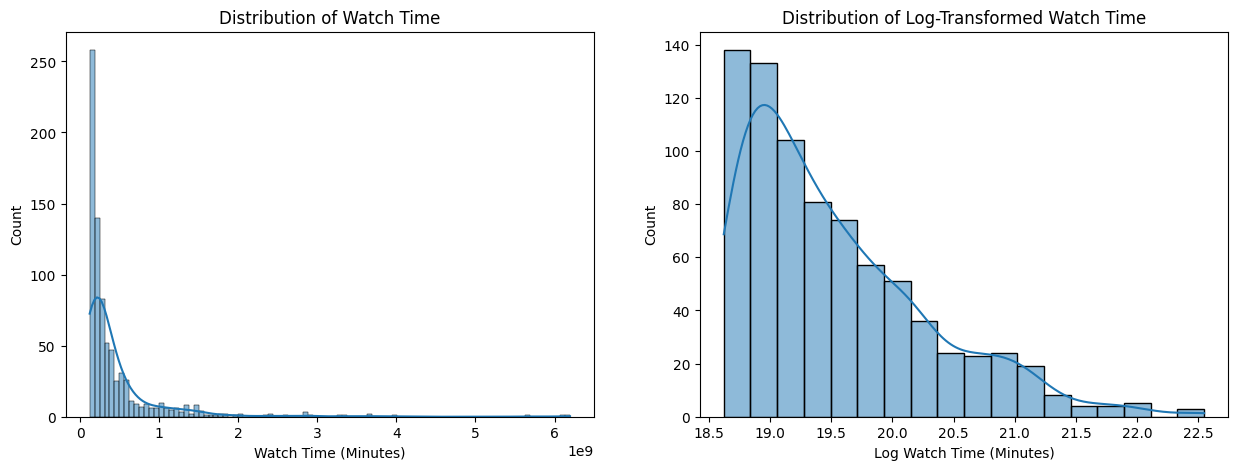

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.watch_time_minutes, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Watch Time (Minutes)')
axes[0].set_title('Distribution of Watch Time')

sns.histplot(np.log(df.watch_time_minutes), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Watch Time (Minutes)')
axes[1].set_title('Distribution of Log-Transformed Watch Time')

Text(0.5, 1.0, 'Distribution of Log-Transformed Average Viewers')

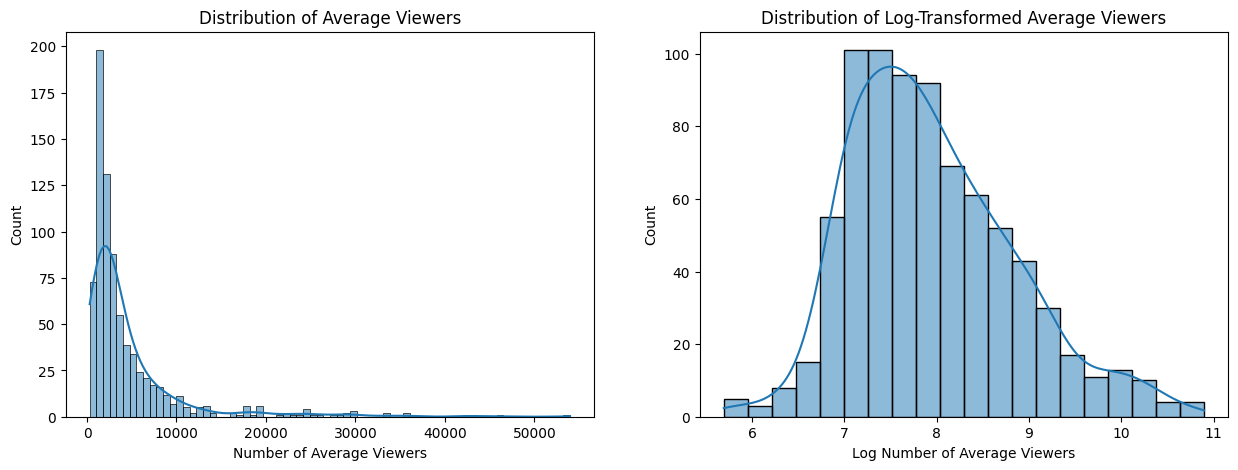

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.average_viewers, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Number of Average Viewers')
axes[0].set_title('Distribution of Average Viewers')

sns.histplot(np.log(df.average_viewers), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Number of Average Viewers')
axes[1].set_title("Distribution of Log-Transformed Average Viewers")

Text(0.5, 1.0, 'Distribution of Log-Transformed Followers')

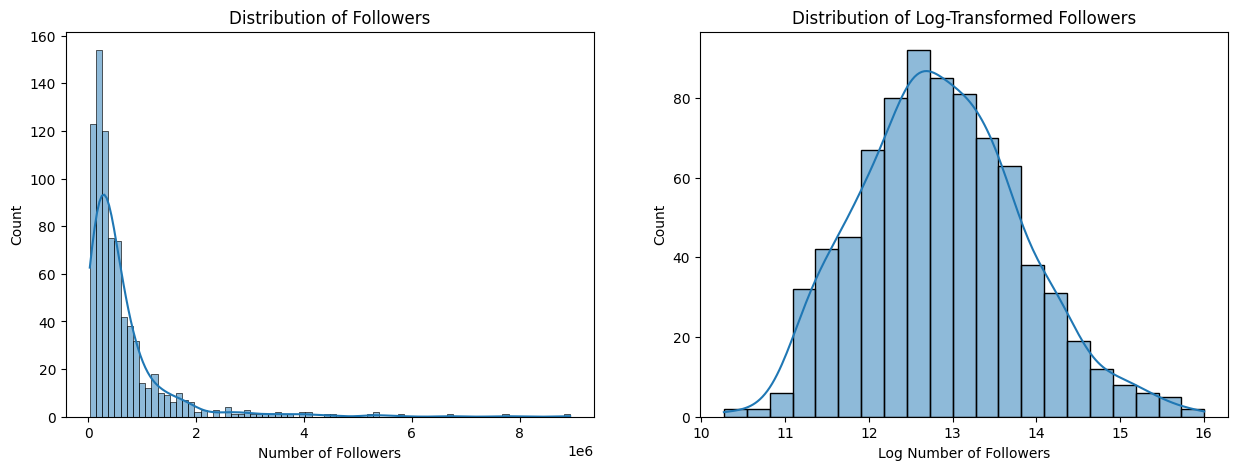

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df.followers, kde=True, ax=axes[0]) 
axes[0].set_xlabel('Number of Followers')
axes[0].set_title("Distribution of Followers")

sns.histplot(np.log(df.followers), kde=True, ax=axes[1]) 
axes[1].set_xlabel('Log Number of Followers')
axes[1].set_title("Distribution of Log-Transformed Followers")

Text(0.5, 1.0, 'Distribution of Followers Gained')

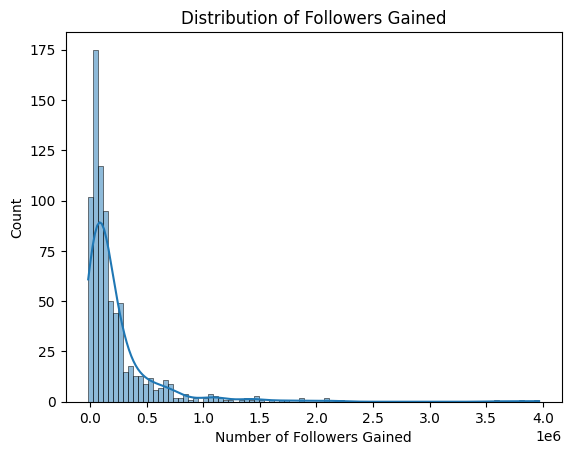

In [46]:
sns.histplot(df.followers_gained, kde=True) 
plt.xlabel('Number of Followers Gained')
plt.title("Distribution of Followers Gained")

In [13]:
df.groupby('partnered').size().sort_values(ascending=False)

partnered
True     781
False      7
dtype: int64

In [14]:
df.groupby('mature').size().sort_values(ascending=False)

mature
False    577
True     211
dtype: int64

In [15]:
df.groupby('language').size().sort_values(ascending=False)

language
English       445
French         63
Spanish        61
Portuguese     52
German         47
Russian        38
Turkish        19
Italian        16
Polish         11
Thai            8
Japanese        6
Czech           6
Chinese         5
Arabic          5
Hungarian       2
Greek           1
Finnish         1
Slovak          1
Swedish         1
dtype: int64